### 1. 加载caifar10数据集

In [1]:
import keras
from keras.datasets import cifar10  
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train=y_train.flatten()
y_test=y_test.flatten()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Using TensorFlow backend.


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)
(10000,)


### 2.缩放图片的像素，使每个图像中的每个像素处于0-1之间

In [2]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 3.  将数据集分解为训练、测试和验证集

In [3]:
from keras.utils import np_utils

# 对标签进行one-hot编码
num_classes = len(np.unique(y_train))  # num_class是输出的类别总数，np.unique去除数组中的重复数字，并进行排序
y_train = keras.utils.to_categorical(y_train, num_classes)  # 将y_train标签数据转为one-hot
y_test = keras.utils.to_categorical(y_test, num_classes) # 将y_test标签数据转为one-hot
print(num_classes)
print(y_train.shape)
print(y_test.shape)

# 将训练集分解为训练集和验证集
(x_train, x_valid) = x_train[5000:], x_train[:5000] # x_train取5000-49999的数据，x_valid取0-4999的数据
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)

10
(50000, 10)
(10000, 10)
x_train shape: (45000, 32, 32, 3)
x_valid shape: (5000, 32, 32, 3)
y_train shape: (45000, 10)
y_valid shape: (5000, 10)


### 4.使用keras构建卷积神经网络

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 第一层卷积层的参数定义
FILTER1_NUM = 16   # 过滤器的个数是1
FILTER1_SIZE = 2   # 过滤器的尺寸为2*2
FILTER1_STRIDES = 1  # 设置步长为1
PADDING1 = 'same'  # 经过卷积层后的大小不变 
ACTIVATION1 = 'relu'  # 采用relu激活函数 
# 第一层池化层的参数定义
POOL1_SIZE = 2  # 池化大小为2

# 第二层卷积层的参数定义
FILTER2_NUM = 32
FILTER2_SIZE = 2
FILTER2_STRIDES = 1
PADDING2 = 'same'
ACTIVATION2 = 'relu'
model = Sequential()
# 第二层池化层的参数定义
POOL2_SIZE = 2

# 第三层卷积层的参数定义
FILTER3_NUM = 64
FILTER3_SIZE = 2
FILTER3_STRIDES = 1
PADDING3 = 'same'
ACTIVATION3 = 'relu'
# 第三层池化层的参数定义
POOL3_SIZE = 2

model = Sequential()
# 添加第一层卷积层和池化层，第一层卷积层采用16个卷积过滤器，尺寸为2*2，分别对3层的图片进行处理
model.add(Conv2D(filters=FILTER1_NUM,  
                kernel_size=FILTER1_SIZE,  
                strides=FILTER1_STRIDES,  
                padding=PADDING1,  
                activation=ACTIVATION1,   
                input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])# input_shape为高度、宽度、深度
                ))
model.add(MaxPooling2D(pool_size=POOL1_SIZE)) # 添加池化层，采用最大池化，大小为2

#添加第二层卷积层和池化层
model.add(Conv2D(filters=FILTER2_NUM, 
                 kernel_size=FILTER2_SIZE,
                 strides=FILTER2_STRIDES,
                 padding=PADDING2, 
                 activation=ACTIVATION2))
model.add(MaxPooling2D(pool_size=POOL2_SIZE))  # 添加池化层，采用最大池化，大小为2

#添加第三层卷积层和池化层
model.add(Conv2D(filters=FILTER3_NUM, 
                 kernel_size=FILTER3_SIZE,
                 strides=FILTER3_STRIDES,
                 padding=PADDING3, 
                 activation=ACTIVATION3))
model.add(MaxPooling2D(pool_size=POOL3_SIZE)) # 添加池化层，采用最大池化，大小为2

model.add(Dropout(0.3))  # dropout技术防止过拟合，丢弃的概率为0.3
model.add(Flatten())  # 扁平化矩阵，此时已经提取相关特征，对空间信息已不关心
model.add(Dense(1024, activation='relu'))  # 激活函数采用relu函数
model.add(Dropout(0.3))  # dropout技术防止过拟合，丢弃的概率为0.3
model.add(Dense(10, activation='softmax'))  # 输出节点为10，激活函数采用softmax函数

model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 5. 编译模型 

In [5]:
model.compile(loss='categorical_crossentropy',  # 采用分类交叉熵损失函数
              optimizer='rmsprop',   # 优化器使用RMSProp
              metrics=['accuracy'])

### 6.训练构建好的卷积神经网络

In [6]:
from keras.callbacks import ModelCheckpoint  # 保存每次更新的权重

checkpointer = ModelCheckpoint(filepath=r'C:\Users\linyongxin\Desktop\CNN.weights.best.hdf5', verbose=1, 
                               save_best_only=True)  
model.fit(x_train, y_train, 
          batch_size=100, 
          epochs=100,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 4s - loss: 1.6488 - acc: 0.4040 - val_loss: 1.4096 - val_acc: 0.4964

Epoch 00001: val_loss improved from inf to 1.40959, saving model to C:\Users\linyongxin\Desktop\CNN.weights.best.hdf5
Epoch 2/100
 - 2s - loss: 1.3352 - acc: 0.5216 - val_loss: 1.1686 - val_acc: 0.5864

Epoch 00002: val_loss improved from 1.40959 to 1.16862, saving model to C:\Users\linyongxin\Desktop\CNN.weights.best.hdf5
Epoch 3/100
 - 2s - loss: 1.2019 - acc: 0.5715 - val_loss: 1.0583 - val_acc: 0.6300

Epoch 00003: val_loss improved from 1.16862 to 1.05830, saving model to C:\Users\linyongxin\Desktop\CNN.weights.best.hdf5
Epoch 4/100
 - 2s - loss: 1.1065 - acc: 0.6062 - val_loss: 0.9747 - val_acc: 0.6658

Epoch 00004: val_loss improved from 1.05830 to 0.97468, saving model to C:\Users\linyongxin\Desktop\CNN.weights.best.hdf5
Epoch 5/100
 - 2s - loss: 1.0338 - acc: 0.6352 - val_loss: 0.9673 - val_acc: 0.6674

Epoch 00005: val_loss improved from 0.9746

 - 2s - loss: 0.3508 - acc: 0.8834 - val_loss: 0.8246 - val_acc: 0.7608

Epoch 00052: val_loss did not improve from 0.71004
Epoch 53/100
 - 2s - loss: 0.3588 - acc: 0.8819 - val_loss: 0.7554 - val_acc: 0.7682

Epoch 00053: val_loss did not improve from 0.71004
Epoch 54/100
 - 2s - loss: 0.3440 - acc: 0.8837 - val_loss: 0.7976 - val_acc: 0.7754

Epoch 00054: val_loss did not improve from 0.71004
Epoch 55/100
 - 2s - loss: 0.3523 - acc: 0.8844 - val_loss: 0.8432 - val_acc: 0.7698

Epoch 00055: val_loss did not improve from 0.71004
Epoch 56/100
 - 2s - loss: 0.3485 - acc: 0.8848 - val_loss: 0.8617 - val_acc: 0.7586

Epoch 00056: val_loss did not improve from 0.71004
Epoch 57/100
 - 2s - loss: 0.3364 - acc: 0.8873 - val_loss: 0.9092 - val_acc: 0.7702

Epoch 00057: val_loss did not improve from 0.71004
Epoch 58/100
 - 2s - loss: 0.3498 - acc: 0.8841 - val_loss: 0.7941 - val_acc: 0.7498

Epoch 00058: val_loss did not improve from 0.71004
Epoch 59/100
 - 2s - loss: 0.3453 - acc: 0.8876 - val_

### 7. 加载分类精度最好的模型

In [10]:
model.load_weights(r'C:\Users\linyongxin\Desktop\CNN.weights.best.hdf5')

### 8. 用测试集来测试模型的精度

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7535


### 9.可视化结果

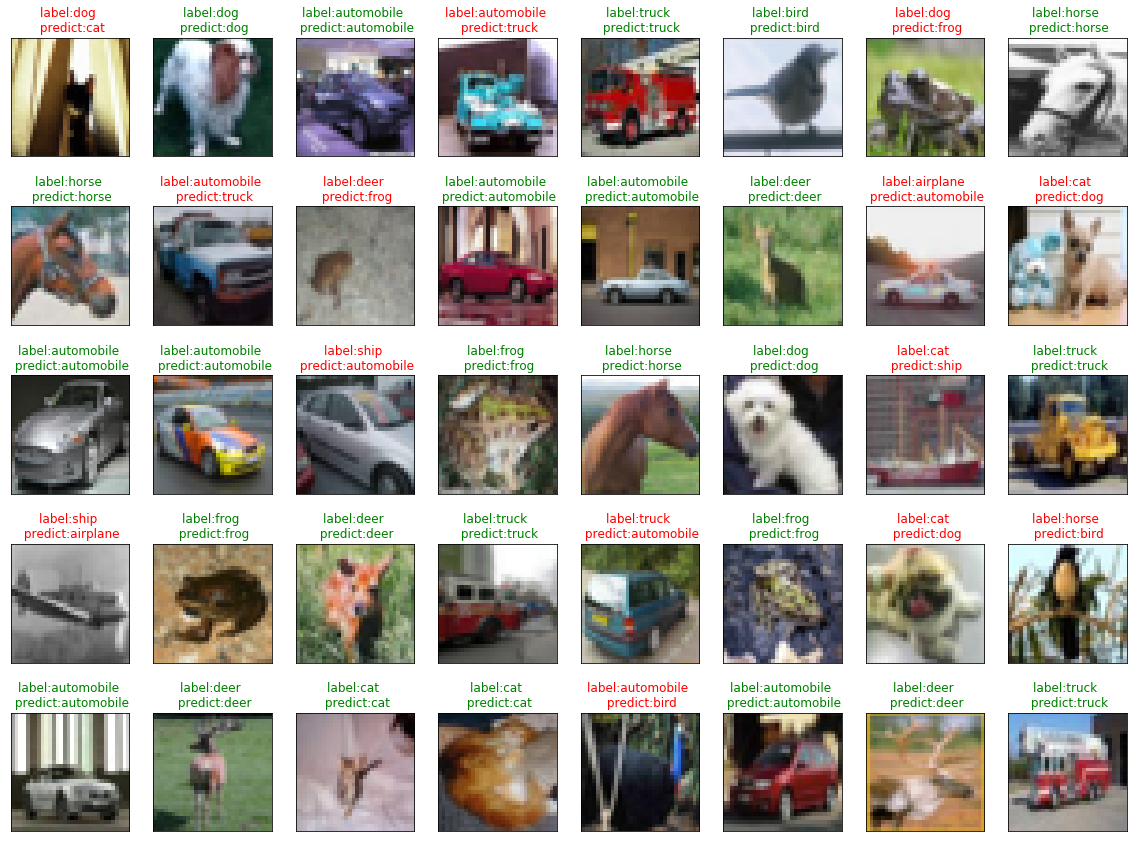

In [29]:
# 获取测试集的预测结果
y_predict = model.predict(x_test)

# 定义标签
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 可视化一些测试集样本以及他们的预测结果
fig = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=40, replace=False)):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_predict[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("label:{} \n predict:{}".format(cifar10_labels[predict_index], cifar10_labels[true_index]),
                 color=("green" if predict_index == true_index else "red"))  # 如果预测正确则标绿色，否则红色